In [5]:
colab = True
import os,sys

if colab == True:
    from google.colab import drive
    drive.mount('/content/drive')
    sys.path.append('./drive/MyDrive/Colab Notebooks/Machine Learning/MovieRecommendation')
    cmd_movie = "./drive/MyDrive/Colab Notebooks/Machine Learning/MovieRecommendation/" # """ PATH to Project's Folder !!!!!!"""
    # sys.path.append('/content/gdrive//content/drive')

else:
    cmd_movie = "./"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import warnings
import pandas as pd
import statistics
import numpy as np

import matplotlib
from matplotlib        import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
# -------------------------------------------------------------------------------- # sklearn Modules
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
# -------------------------------------------------------------------------------- # Custom Modules 
from src import helper
from src import cluster

plt.style.use('ggplot')
RUN_TYPE = "Colab"
y_cols = ["gross", "budget"]
X_col = ["rating", "score"] # "genre","company"]
h = 0.02  # step size in the mesh



def cleanLabels(df, col_name):
    avg_gross = helper.mean(df[col_name].to_numpy())
    _data = df[col_name].to_numpy()
    for index,_ in enumerate(_data):
        if _data[index] >= avg_gross:
            _data[index] = 3
        elif _data[index] >= (avg_gross - avg_gross/2):
            _data[index] = 2
        elif _data[index] >= avg_gross/2:
            _data[index] = 1
        else:
            _data[index] = 0
    df[col_name] = _data
    return df





def clean_df(_DATA_):
    _DATA_ = helper.removeNaN(_DATA_, "gross")
    _DATA_ = helper.removeNaN(_DATA_, "budget")
    _DATA_ = helper.removeNaN(_DATA_, "rating")
    _DATA_ = helper.removeNaN(_DATA_, "score")   # company
    _DATA_ = cleanLabels(_DATA_, "gross")
    _DATA_ = cleanLabels(_DATA_, "budget")

    df_rating = [str(i) for i in _DATA_.rating.values]
    df_genre   = [str(i) for i in _DATA_.genre.values]
    df_company = [str(i) for i in _DATA_["company"].values]


    ratingLT = list(set(df_rating))
    companyLT = list(set(df_company))
    genreLT   = list(set(df_genre))


    for idx, row in enumerate(_DATA_.rating):
        df_rating[idx] = ratingLT.index(row)

    for idx, row in enumerate(_DATA_.genre):
        df_genre[idx] = genreLT.index(row)

    for idx, row in enumerate(df_company):
        df_company[idx] = companyLT.index(row)



    _DATA_["rating"] = df_rating
    _DATA_["genre"] = df_genre
    _DATA_["company"] = df_company
    return _DATA_


def runClustering(DATA):
    for y_col in y_cols[0]:
        # print (f"Generating KNN with\n   ==> label_col = {y_col}")
        y = DATA[y_col].to_numpy()
        X = DATA[X_col].to_numpy()
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.3, random_state=42)
        KNN = cluster.train(X, y)
        # y_pred = KNN.predict(X_test)
        # crossValResults = cluster.Eval.cross_val(KNN, X_test, y_test)

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        zz = np.c_[xx.ravel(), yy.ravel()]
        print(xx.ravel().shape, yy.ravel().shape)
        print(zz.shape)
        print(X.shape, y.shape)
        Z = KNN.predict(zz)

        
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.figure(figsize=(8, 6))
        plt.contourf(xx, yy, Z, cmap=cmap_light)

        # Plot also the training points
        sns.scatterplot(
            x=X[:, 0],
            y=X[:, 1],
            hue=iris.target_names[y],
            palette=cmap_bold,
            alpha=1.0,
            edgecolor="black",
        )
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title(
            "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
        )
        plt.xlabel(iris.feature_names[0])
        plt.ylabel(iris.feature_names[1])
        plt.show()



def main():

    DATA_PATH = "data/movies_v1.csv"
    DATA_ORIGINAL_PATH = "data/movies_original.csv"
    cwd = os.getcwd()

    DATA_PATH = os.path.join(cmd_movie, DATA_PATH)
    DATA_ORIGINAL_PATH = os.path.join(cmd_movie, DATA_ORIGINAL_PATH)

    # print(DATA_PATH)
    DATA = pd.read_csv(DATA_PATH)
    # DATA_ORIGINAL = pd.read_csv(DATA_ORIGINAL_PATH)
    # ------------------------------------------------------------ #
    print("Booting up the Movie Recommended System ...")
    print (f"{DATA} ")
    runClustering(clean_df(DATA))




if __name__ == "__main__":
    main()
    # print("--------------------------------")
    # print (f"DATA -- ORIGINAL")
    # # KNN, X_test, y_test = runClustering(clean_df(DATA_ORIGINAL))


Booting up the Movie Recommended System ...
                                  name rating  ...                  company  runtime
0                           Maleficent     PG  ...                Jolie Pas     97.0
1            Pokémon Detective Pikachu     PG  ...             Warner Bros.    104.0
2                         TRON: Legacy     PG  ...     Walt Disney Pictures    125.0
3                       The Karate Kid     PG  ...        Columbia Pictures    140.0
4     Journey 2: The Mysterious Island     PG  ...          New Line Cinema     94.0
...                                ...    ...  ...                      ...      ...
1347          Star Trek First Frontier    NaN  ...  An Impulsive Production     85.0
1348                     Bennett's War  PG-13  ...        ESX Entertainment     94.0
1349                      No Good Deed  PG-13  ...              Screen Gems     84.0
1350                      The Intruder  PG-13  ...              Screen Gems    102.0
1351                 

KeyError: ignored

In [6]:

def runClustering(DATA):
    for y_col in y_cols:
        # print (f"Generating KNN with\n   ==> label_col = {y_col}")
        y = DATA[y_col].to_numpy()
        X = DATA[X_col].to_numpy()
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        KNN = cluster.train(X,y)
        crossValResults = cluster.Eval.cross_val(KNN, X_test, y_test)


        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                            np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)

        print (Z)
        exit()
        print(f"{y_col} -- {helper.mean(crossValResults)}")
        cluster.generateFigure(KNN, X_test, y_test)
        return KNN, X_test, y_test






def main():

    DATA_PATH = "data/movies_v1.csv"
    DATA_ORIGINAL_PATH = "data/movies_original.csv"
    cwd  = os.getcwd()

    DATA_PATH= os.path.join(cmd_movie,DATA_PATH)
    DATA_ORIGINAL_PATH= os.path.join(cmd_movie,DATA_ORIGINAL_PATH)

    # print(DATA_PATH)
    DATA               =  pd.read_csv(DATA_PATH)
    DATA_ORIGINAL      =  pd.read_csv(DATA_ORIGINAL_PATH)
    # ------------------------------------------------------------ #
    print("Booting up the Movie Recommended System ...")
    # print (f"{DATA} ")
    # print (f"{DATA_ORIGINAL} ")
    runClustering(clean_df(DATA))

    
    exit()

    # exit()
    # print("--------------------------------")
    # print (f"DATA -- ORIGINAL")
    # # KNN, X_test, y_test = runClustering(clean_df(DATA_ORIGINAL))









if __name__ == "__main__":
    # DATA_PATH_original = "data/movies_original.csv"
    main()
    # y = df_clean[y_col[0]].to_numpy()
    # X = df_clean[X_col].to_numpy()
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)
    # knn = trainCluster(X,y)
    # modelEval(knn, X_test, y_test)


Booting up the Movie Recommended System ...


NameError: ignored

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


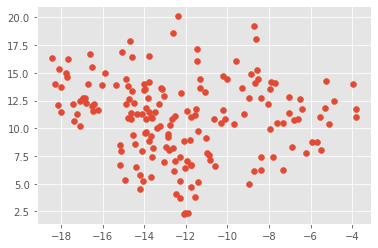

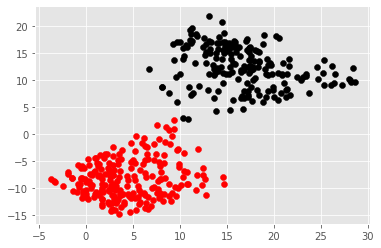

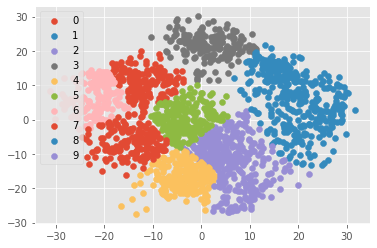

In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
#Load Data
data = load_digits().data
pca = PCA(2)

#Transform the data
df = pca.fit_transform(data)
 
df.shape
#Initialize the class object
kmeans = KMeans(n_clusters= 10)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
print(set(label))


#filter rows of original data
filtered_label0 = df[label == 0]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

#filter rows of original data
filtered_label2 = df[label == 2]
 
filtered_label8 = df[label == 8]
 
#Plotting the results
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'red')
plt.scatter(filtered_label8[:,0] , filtered_label8[:,1] , color = 'black')
plt.show()


#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()


#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 


In [8]:
import warnings
import pandas as pd
import statistics
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA

import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from src import helper
from src import cluster
import os
import sys
cmd_movie = "./"
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

# -------------------------------------------------------------------------------- # sklearn Modules
# -------------------------------------------------------------------------------- # Custom Modules

plt.style.use('ggplot')
RUN_TYPE = "Colab"
y_cols = ["gross", "budget"]
# X_col = ["rating", "score"]
X_col = ["rating", "score", "genre", "company"]

# ]
h = 0.02  # step size in the mesh


def cleanLabels(df, col_name):
    target_names = df.copy()[col_name]
    sum_gross = sum(df[col_name].to_numpy())
    data_sorted = np.sort(df[col_name])

    b1 = int(len(data_sorted) * 1/3)
    b2 = int(len(data_sorted) * 2/4)
    b3 = int(len(data_sorted) * 3/4)

    # print(data_sorted, b1, b2)
    avg_gross = helper.mean(df[col_name].to_numpy())
    _data = df[col_name].to_numpy()
    for index, _ in enumerate(_data):
        if _data[index] >= data_sorted[b3]:
            target_names[index] = f"Level 4"
            _data[index] = 3
        elif _data[index] >= data_sorted[b2]:
            target_names[index] = f"Level 2"
            _data[index] = 2
        elif _data[index] >= data_sorted[b1]:
            target_names[index] = f"Level 2"
            _data[index] = 1
        else:
            target_names[index] = f"Level 1"
            _data[index] = 0

        # else:
        #     target_names[index] = f"Level 3"
        #     _data[index] = 3

        # if _data[index] >= avg_gross/2:
        #     target_names[index] = f"Level 1"
        #     _data[index] = 1
        # else:
        #     target_names[index] = f"Level 0"
        #     _data[index] = 0

    df[col_name] = _data
    return df, target_names


def clean_df(_DATA_):
    _DATA_ = helper.removeNaN(_DATA_, "gross")
    _DATA_ = helper.removeNaN(_DATA_, "budget")
    _DATA_ = helper.removeNaN(_DATA_, "rating")
    _DATA_ = helper.removeNaN(_DATA_, "score")   # company

    _DATA_, target_gross = cleanLabels(_DATA_, "gross")
    _DATA_, target_budget = cleanLabels(_DATA_, "budget")

    df_rating = [str(i) for i in _DATA_.rating.values]
    df_genre = [str(i) for i in _DATA_.genre.values]
    df_company = [str(i) for i in _DATA_["company"].values]

    ratingLT = list(set(df_rating))
    companyLT = list(set(df_company))
    genreLT = list(set(df_genre))

    for idx, row in enumerate(_DATA_.rating):
        df_rating[idx] = ratingLT.index(row)

    for idx, row in enumerate(_DATA_.genre):
        df_genre[idx] = genreLT.index(row)

    for idx, row in enumerate(df_company):
        df_company[idx] = companyLT.index(row)

    _DATA_["rating"] = df_rating
    _DATA_["genre"] = df_genre
    _DATA_["company"] = df_company
    return _DATA_, target_gross, target_budget


def runClustering(DATA, target_gross, target_budget):
    # y_col = y_cols[0:]
    for y_col in range(1):
        y_col = y_cols[y_col]
        # print (f"Generating KNN with\n   ==> label_col = {y_col}")
        # print(DATA)
        # print(y_col)

        y = DATA[y_col].to_numpy()
        X = DATA[X_col].to_numpy()

        pca = PCA(2)
        X = pca.fit_transform(X)
        print(X)
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.3, random_state=42)
        KNN = cluster.train(X, y)
        # y_pred = KNN.predict(X_test)
        # crossValResults = cluster.Eval.cross_val(KNN, X_test, y_test)

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1,  X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        zz = np.c_[xx.ravel(), yy.ravel()]
        Z = KNN.predict(zz)

        # print(xx.ravel().shape, yy.ravel().shape)
        # print(zz.shape)
        # print(X.shape, y.shape)

        Z = Z.reshape(xx.shape)         # Put the result into a color plot
        plt.figure(figsize=(8, 6))
        print(xx)
        print(yy)
        print(Z)

        plt.contourf(xx, yy, Z, cmap=cmap_light)
        target_names = list(set(y))
        # print(DATA[y_col])

        # # Plot also the training points
        sns.scatterplot(
            x=X[:, 0],
            y=X[:, 1],
            hue=y,
            # palette=cmap_bold,
            palette=sns.color_palette(
                'coolwarm', n_colors=4),

            alpha=1.0,
            edgecolor="black",
        )

        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        # plt.title(
        #     "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
        # )
        # plt.xlabel(iris.feature_names[0])
        # plt.ylabel(iris.feature_names[1])
        plt.show()

        # # Put the result into a color plot
        # Z = Z.reshape(xx.shape)
        # pl.figure(1, figsize=(4, 3))
        # pl.set_cmap(pl.cm.Paired)
        # pl.pcolormesh(xx, yy, Z)

        # # Plot also the training points
        # pl.scatter(X[:, 0], X[:, 1], c=Y)
        # pl.xlabel('Sepal length')
        # pl.ylabel('Sepal width')

        # pl.xlim(xx.min(), xx.max())
        # pl.ylim(yy.min(), yy.max())
        # pl.xticks(())
        # pl.yticks(())

        # pl.show()


def main():

    DATA_PATH = "data/movies_v1.csv"
    DATA_ORIGINAL_PATH = "data/movies_original.csv"
    cwd = os.getcwd()

    DATA_PATH = os.path.join(cmd_movie, DATA_PATH)
    DATA_ORIGINAL_PATH = os.path.join(cmd_movie, DATA_ORIGINAL_PATH)

    # print(DATA_PATH)
    DATA = pd.read_csv(DATA_PATH)
    # DATA_ORIGINAL = pd.read_csv(DATA_ORIGINAL_PATH)
    # ------------------------------------------------------------ #
    print("Booting up the Movie Recommended System ...")
    print(f"{DATA} ")

    data, t_gross, t_budget = clean_df(DATA)
    runClustering(data, t_gross, t_budget)


if __name__ == "__main__":
    main()
    # print("--------------------------------")
    # print (f"DATA -- ORIGINAL")
    # # KNN, X_test, y_test = runClustering(clean_df(DATA_ORIGINAL))


FileNotFoundError: ignored